# SHOP CUSTOMER ANALYSIS

# 1)Analyse the customer segmentation of the dataset

# 2)Data Collection

Data is collected from https://www.kaggle.com/datasets/datascientistanna/customers-dataset?datasetId=2877553

### 2.1)Import Required Packages

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

### 2.2)Import CSV as dataset

In [81]:
df = pd.read_csv("Customers.csv")
print(df.shape)

(2000, 8)


In [82]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# 3)Data Cleaning

### 3.1) Handling missing values and other anomolies

* **Checking for Missing values in DataFrame using is null function**

In [83]:
df.isnull().sum()

CustomerID         0
Gender             0
Age                0
AnnualIncome       0
SpendingScore      0
Profession        35
WorkExperience     0
FamilySize         0
dtype: int64

In [84]:
df.isnull().mean()

CustomerID        0.0000
Gender            0.0000
Age               0.0000
AnnualIncome      0.0000
SpendingScore     0.0000
Profession        0.0175
WorkExperience    0.0000
FamilySize        0.0000
dtype: float64

In [85]:
df.isnull().mean().sort_values(ascending=False)

Profession        0.0175
CustomerID        0.0000
Gender            0.0000
Age               0.0000
AnnualIncome      0.0000
SpendingScore     0.0000
WorkExperience    0.0000
FamilySize        0.0000
dtype: float64

In [86]:
df.dtypes

CustomerID         int64
Gender            object
Age                int64
AnnualIncome       int64
SpendingScore      int64
Profession        object
WorkExperience     int64
FamilySize         int64
dtype: object

In [87]:
(df.isnull().mean().sort_values(ascending=False)[0:6])*100

Profession       1.75
CustomerID       0.00
Gender           0.00
Age              0.00
AnnualIncome     0.00
SpendingScore    0.00
dtype: float64

* **Checking Unique values of the column**

In [88]:
df.Gender.value_counts()

Female    1186
Male       814
Name: Gender, dtype: int64

In [89]:
df.Age.value_counts()

31    31
32    30
52    30
91    29
63    28
      ..
42    12
10    12
77    12
71    12
98     9
Name: Age, Length: 100, dtype: int64

In [90]:
df.AnnualIncome.value_counts()

50000     7
9000      7
97000     6
85000     6
4000      6
         ..
111859    1
186655    1
164598    1
132951    1
110610    1
Name: AnnualIncome, Length: 1786, dtype: int64

In [91]:
df.SpendingScore.value_counts()

49    34
42    33
55    32
17    31
46    28
      ..
72    12
6     12
9     12
95    12
0      2
Name: SpendingScore, Length: 101, dtype: int64

In [92]:
df.Profession.value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

In [93]:
df.WorkExperience.value_counts()

1     470
0     431
8     166
9     160
7     126
4     121
6     120
5     117
10     84
2      63
3      55
12     17
13     16
14     16
11     14
15     14
16      5
17      5
Name: WorkExperience, dtype: int64

In [94]:
df.FamilySize.value_counts()

2    361
3    311
1    299
4    289
5    258
6    243
7    234
8      4
9      1
Name: FamilySize, dtype: int64

In [95]:
df.head(10)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


* **Filling null values with mode**

In [96]:
df["Profession"].fillna(df.Profession.mode()[0],inplace= True) 

In [97]:
df.shape

(2000, 8)

* **Checking for duplicated values**

In [98]:
df.duplicated().sum()

0

* **Removing features which have no effect on the Analysis**

In [99]:
df.drop(["CustomerID"],inplace = True,axis=1)

In [100]:
df[df['Age'] <= 18]#very rare for people < 19 to be earning so data error

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
33,Male,18,62000,92,Homemaker,9,7
65,Male,18,9000,59,Entertainment,0,2
91,Male,18,36000,41,Artist,1,4
114,Female,18,97000,48,Executive,0,3
202,Female,16,60000,0,Engineer,6,8
...,...,...,...,...,...,...,...
1974,Female,14,153145,59,Healthcare,8,6
1979,Male,0,165321,93,Doctor,8,1
1980,Female,10,86925,76,Artist,7,2
1984,Female,2,153622,51,Lawyer,6,6


In [101]:
df[df['AnnualIncome'] == 0]#data error since they have a good spending score and have a Profession

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
169,Male,32,0,63,Artist,2,2
246,Male,23,0,96,Doctor,1,3


* **Replacing 0 values with mode**

In [102]:
df_doc = df[df['Profession'] == 'Doctor']
df_art = df[df['Profession'] == 'Artist']

In [103]:
df.loc[((df['Profession'] == 'Doctor') & (df['AnnualIncome']==0)), 'AnnualIncome'] = df_doc.AnnualIncome.mode()[0]
df.loc[((df['Profession'] == 'Artist') & (df['AnnualIncome']==0)), 'AnnualIncome'] = df_art.AnnualIncome.mode()[0]

It is highly unlikely that above 80 we have people working in every profession so,we will include selected professions only

In [104]:
df = df[df['Age'] >= 18]

In [105]:
df[df['Age']>80].shape

(375, 7)

####delete Age > 80, whose profession is other than Artist and Entertainment

In [106]:
df[((df['Age']>80) & (df['Profession']!='Artist')) & ((df['Age']>80) & (df['Profession']!='Entertainment'))].shape

(194, 7)

In [107]:
df = df[(df['Age']<=80) | ((df['Age']<100) & (df['Profession']=='Artist')) | ((df['Age']<=100) & (df['Profession']=='Entertainment'))]
df

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1993,Female,64,175254,100,Artist,9,5
1994,Female,19,54121,89,Engineer,6,3
1995,Female,71,184387,40,Artist,8,7
1998,Male,77,182109,4,Executive,7,2


#4)Data Frame Exploration

In [108]:
#Data Exploration
df.head()

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


In [109]:
df.describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,52.706920,107584.247626,50.320217,4.030529,3.727951
std,21.942642,46438.486316,27.631103,3.892272,1.956747
min,18.000000,1000.000000,1.000000,0.000000,1.000000
25%,34.000000,71000.000000,27.000000,1.000000,2.000000
50%,52.000000,104107.000000,49.000000,3.000000,4.000000
75%,69.000000,146411.500000,74.000000,7.000000,5.000000
max,99.000000,189945.000000,100.000000,17.000000,9.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          1474 non-null   object
 1   Age             1474 non-null   int64 
 2   AnnualIncome    1474 non-null   int64 
 3   SpendingScore   1474 non-null   int64 
 4   Profession      1474 non-null   object
 5   WorkExperience  1474 non-null   int64 
 6   FamilySize      1474 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 92.1+ KB


#4) Visualisation

###4.1)Customer's Profession Analysis

In [111]:
#Customers based on professions
cust_profession_data = df["Profession"].value_counts().reset_index()
cust_profession_data.columns = ["Profession","Total_Customers"]
cust_profession_data

,Profession,Total_Customers
0,Artist,544
1,Healthcare,228
2,Entertainment,197
3,Engineer,113
4,Doctor,103
5,Executive,101
6,Lawyer,94
7,Marketing,53
8,Homemaker,41


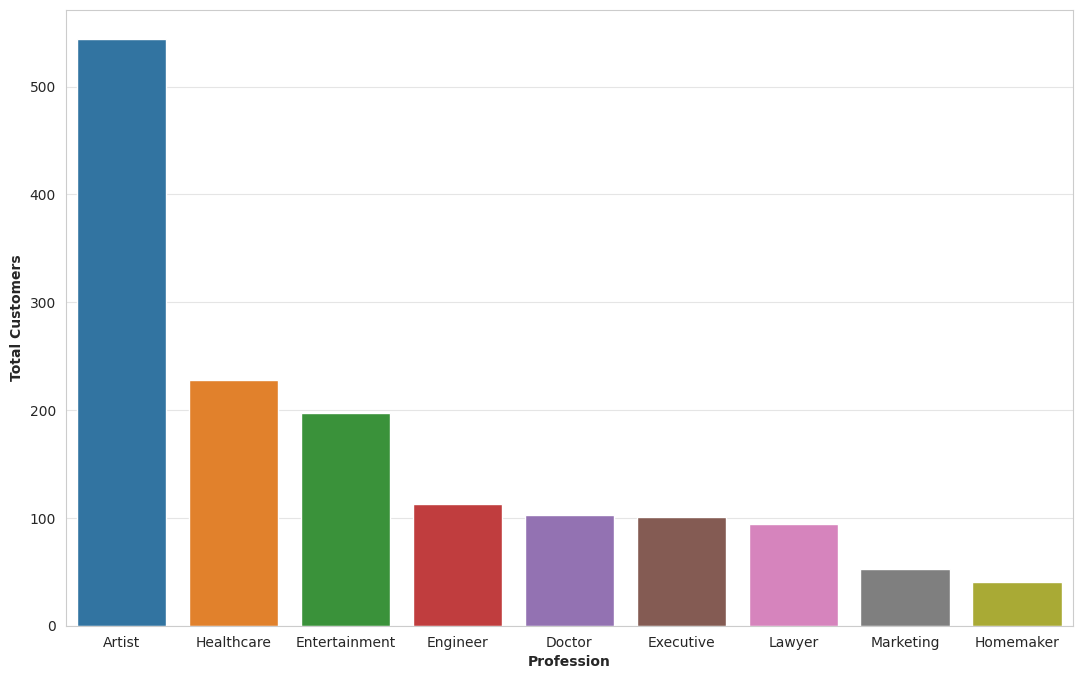

In [112]:
name = cust_profession_data["Profession"].head(12)
total= cust_profession_data["Total_Customers"].head(12)

#Plot Bar chart of Professions
sns.set_style("whitegrid")
plt.subplots(figsize=(13,8))

sns.barplot(x= name[0:10],y =total[0:10]) # oTH TO 10TH
plt.xlabel("Profession",weight="bold")
plt.ylabel("Total Customers",weight="bold")
plt.grid(alpha = 0.5,axis = "y")

###4.2)Customer Gender Analysis

In [113]:
#Annual Income based on Gender
df.groupby(["Gender"])["AnnualIncome"].value_counts()

Gender  AnnualIncome
Female  31000           5
        3000            4
        9000            4
        18000           4
        50000           4
                       ..
Male    188620          1
        189091          1
        189498          1
        189650          1
        189945          1
Name: AnnualIncome, Length: 1345, dtype: int64

In [114]:
# Plot Piechart for both Gender types
percentage = df.Gender.value_counts(normalize=True)*100
pielabels = ["Female","Male"]
f1 = px.pie(values= percentage, names= pielabels, title="Percentage of Age Groups")
f1.update_traces(textposition="inside", textinfo="percent+label")
f1.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
f1.show()

###4.3)Customer's Age Analysis

In [115]:
#Customers based on age
cust_age_data = df["Age"].value_counts().reset_index()
cust_age_data.columns = ["Age","Total_Customers"]
cust_age_data

,Age,Total_Customers
0,31,31
1,52,30
2,32,30
3,63,28
4,54,28
...,...,...
77,89,7
78,99,7
79,82,7
80,93,7


* **Age has too many discrete values so we need to use ranges of ages**

In [116]:
#Since Age has too many discrete values we need to use ranges
df.loc[
    ((df['Age'] >= 18) & (df['Age']<30)), 'category_age'] = '18-29'
df.loc[
    ((df['Age'] >= 30) & (df['Age']<40)), 'category_age'] = '30-39'
df.loc[
    ((df['Age'] >= 40) & (df['Age']<50)), 'category_age'] = '40-49'
df.loc[
    ((df['Age'] >= 50) & (df['Age']<60)), 'category_age'] = '50-59'
df.loc[
    ((df['Age'] >= 60) & (df['Age']<70)), 'category_age'] = '60-69'
df.loc[
    ((df['Age'] >= 70) & (df['Age']<80)), 'category_age'] = '70-79'
df.loc[
    ((df['Age'] >= 80)), 'category_age'] = '>=80'

df

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize,category_age
0,Male,19,15000,39,Healthcare,1,4,18-29
1,Male,21,35000,81,Engineer,3,3,18-29
2,Female,20,86000,6,Engineer,1,1,18-29
3,Female,23,59000,77,Lawyer,0,2,18-29
4,Female,31,38000,40,Entertainment,2,6,30-39
...,...,...,...,...,...,...,...,...
1993,Female,64,175254,100,Artist,9,5,60-69
1994,Female,19,54121,89,Engineer,6,3,18-29
1995,Female,71,184387,40,Artist,8,7,70-79
1998,Male,77,182109,4,Executive,7,2,70-79


* **Checking if Work Experience has 0 values**

In [117]:
df[df['WorkExperience']==0].shape

(321, 8)

Changing Work Experience consisting of 0 values with median value

In [118]:
df[(df['category_age']=='>=80')&(df['WorkExperience']!=0)&(df['Profession']=='Engineer')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,2.0,2.000000,2.000000,2.000000,2.000000
mean,80.0,29500.000000,63.000000,5.000000,3.500000
std,0.0,13435.028843,42.426407,5.656854,0.707107
min,80.0,20000.000000,33.000000,1.000000,3.000000
25%,80.0,24750.000000,48.000000,3.000000,3.250000
50%,80.0,29500.000000,63.000000,5.000000,3.500000
75%,80.0,34250.000000,78.000000,7.000000,3.750000
max,80.0,39000.000000,93.000000,9.000000,4.000000


In [119]:
df[(df['category_age']=='>=80')&(df['WorkExperience']!=0)&(df['Profession']=='Artist')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,88.916667,117496.824074,48.731481,5.490741,4.138889
std,5.615607,37209.588150,28.331353,3.608130,1.945319
min,80.000000,50798.000000,1.000000,1.000000,1.000000
25%,84.000000,89333.750000,25.750000,2.000000,2.000000
50%,89.000000,117770.000000,47.500000,5.500000,4.000000
75%,93.250000,144417.750000,67.250000,8.000000,6.000000
max,99.000000,187643.000000,99.000000,15.000000,7.000000


In [120]:
df[(df['category_age']=='>=80')&(df['WorkExperience']!=0)&(df['Profession']=='Lawyer')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,2.0,2.000000,2.00000,2.000000,2.000000
mean,80.0,130732.500000,64.00000,5.500000,3.000000
std,0.0,57403.635604,19.79899,6.363961,1.414214
min,80.0,90142.000000,50.00000,1.000000,2.000000
25%,80.0,110437.250000,57.00000,3.250000,2.500000
50%,80.0,130732.500000,64.00000,5.500000,3.000000
75%,80.0,151027.750000,71.00000,7.750000,3.500000
max,80.0,171323.000000,78.00000,10.000000,4.000000


In [121]:
df[(df['category_age']=='>=80')&(df['WorkExperience']!=0)&(df['Profession']=='Entertainment')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,88.928571,111082.404762,53.952381,4.023810,4.047619
std,6.379819,41023.932849,29.239926,3.803003,1.974871
min,80.000000,50223.000000,1.000000,1.000000,1.000000
25%,83.250000,68735.000000,36.000000,1.000000,2.250000
50%,87.500000,112975.000000,53.500000,2.500000,4.000000
75%,95.000000,139951.500000,76.000000,6.000000,5.750000
max,99.000000,186882.000000,100.000000,15.000000,7.000000


In [122]:
df[(df['category_age']=='>=80')&(df['WorkExperience']!=0)&(df['Profession']=='Doctor')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,1.0,1.0,1.0,1.0,1.0
mean,80.0,84471.0,79.0,1.0,5.0
std,NaN,NaN,NaN,NaN,NaN
min,80.0,84471.0,79.0,1.0,5.0
25%,80.0,84471.0,79.0,1.0,5.0
50%,80.0,84471.0,79.0,1.0,5.0
75%,80.0,84471.0,79.0,1.0,5.0
max,80.0,84471.0,79.0,1.0,5.0


In [123]:
df[(df['category_age']=='>=80')&(df['WorkExperience']!=0)&(df['Profession']=='Marketing')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,2.0,2.000000,2.000000,2.000000,2.000000
mean,80.0,82904.000000,68.500000,5.500000,4.500000
std,0.0,33665.353852,34.648232,6.363961,3.535534
min,80.0,59099.000000,44.000000,1.000000,2.000000
25%,80.0,71001.500000,56.250000,3.250000,3.250000
50%,80.0,82904.000000,68.500000,5.500000,4.500000
75%,80.0,94806.500000,80.750000,7.750000,5.750000
max,80.0,106709.000000,93.000000,10.000000,7.000000


In [124]:
df[(df['category_age']=='70-79')&(df['WorkExperience']!=0)&(df['Profession']=='Homemaker')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,5.00000,5.000000,5.000000,5.000000,5.000000
mean,75.40000,107193.600000,60.400000,8.800000,6.400000
std,4.09878,42528.383749,33.366151,3.114482,1.341641
min,70.00000,59971.000000,21.000000,6.000000,4.000000
25%,72.00000,73000.000000,40.000000,7.000000,7.000000
50%,78.00000,112146.000000,51.000000,8.000000,7.000000
75%,78.00000,124359.000000,94.000000,9.000000,7.000000
max,79.00000,166492.000000,96.000000,14.000000,7.000000


In [125]:
df[(df['category_age']=='70-79')&(df['WorkExperience']!=0)&(df['Profession']=='Executive')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,75.071429,141958.214286,44.928571,7.642857,3.642857
std,3.221664,37412.366742,26.377334,2.499450,1.864946
min,70.000000,76892.000000,4.000000,4.000000,1.000000
25%,73.500000,114828.500000,24.750000,5.500000,2.000000
50%,75.500000,156072.000000,42.500000,7.500000,3.500000
75%,77.750000,174461.500000,61.250000,9.750000,4.750000
max,79.000000,182109.000000,88.000000,12.000000,7.000000


In [126]:
df[(df['category_age']=='70-79')&(df['WorkExperience']!=0)&(df['Profession']=='Marketing')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,74.600000,115942.400000,30.400000,4.200000,4.200000
std,4.037326,48612.244911,27.673092,4.658326,1.923538
min,70.000000,64310.000000,8.000000,1.000000,1.000000
25%,71.000000,65528.000000,9.000000,1.000000,4.000000
50%,75.000000,128642.000000,19.000000,2.000000,5.000000
75%,78.000000,153821.000000,43.000000,5.000000,5.000000
max,79.000000,167411.000000,73.000000,12.000000,6.000000


In [127]:
df[(df['category_age']=='70-79')&(df['WorkExperience']!=0)&(df['Profession']=='Lawyer')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,74.545455,109123.454545,49.090909,5.181818,3.000000
std,3.236159,45800.679926,31.985792,4.622081,1.897367
min,70.000000,65000.000000,5.000000,1.000000,1.000000
25%,72.000000,70851.500000,25.000000,1.000000,1.500000
50%,75.000000,91213.000000,39.000000,3.000000,2.000000
75%,77.500000,147719.500000,80.500000,9.000000,5.000000
max,78.000000,184736.000000,93.000000,13.000000,6.000000


In [128]:
df[(df['category_age']=='70-79')&(df['WorkExperience']!=0)&(df['Profession']=='Healthcare')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,75.285714,109070.809524,45.761905,4.523810,4.095238
std,2.411283,40755.720673,19.462540,3.156249,2.278262
min,70.000000,31000.000000,12.000000,1.000000,1.000000
25%,73.000000,83599.000000,32.000000,1.000000,2.000000
50%,76.000000,101858.000000,46.000000,5.000000,4.000000
75%,77.000000,145528.000000,61.000000,8.000000,6.000000
max,79.000000,182317.000000,86.000000,9.000000,7.000000


In [129]:
df[(df['category_age']=='70-79')&(df['WorkExperience']!=0)&(df['Profession']=='Entertainment')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,19.000000,19.000000,19.00000,19.000000,19.000000
mean,73.473684,114297.263158,56.00000,5.000000,4.105263
std,2.435123,34220.658612,22.02776,3.333333,1.696229
min,70.000000,51260.000000,18.00000,1.000000,1.000000
25%,72.500000,93070.500000,42.50000,1.500000,2.500000
50%,73.000000,108544.000000,50.00000,5.000000,4.000000
75%,75.000000,137513.500000,76.50000,8.000000,5.000000
max,79.000000,180437.000000,87.00000,10.000000,7.000000


In [130]:
df[(df['category_age']=='70-79')&(df['WorkExperience']!=0)&(df['Profession']=='Doctor')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,74.285714,118778.357143,47.785714,5.214286,3.857143
std,2.554892,51067.364537,31.899309,3.166618,1.875229
min,71.000000,20000.000000,4.000000,1.000000,1.000000
25%,72.250000,75140.500000,25.500000,2.000000,2.000000
50%,74.000000,125228.500000,42.500000,5.500000,4.000000
75%,75.750000,165410.750000,68.750000,7.000000,5.000000
max,79.000000,177359.000000,97.000000,10.000000,7.000000


In [131]:
df[(df['category_age']=='70-79')&(df['WorkExperience']!=0)&(df['Profession']=='Engineer')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,75.083333,97626.916667,38.083333,5.916667,3.250000
std,2.574643,48297.474535,22.972150,2.843120,2.005674
min,72.000000,23000.000000,8.000000,1.000000,1.000000
25%,73.500000,73172.750000,24.750000,4.500000,1.750000
50%,74.500000,82346.000000,38.000000,7.000000,3.000000
75%,76.500000,138642.250000,47.000000,8.000000,4.250000
max,79.000000,166335.000000,91.000000,9.000000,7.000000


In [132]:
df[(df['category_age']=='70-79')&(df['WorkExperience']!=0)&(df['Profession']=='Artist')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,74.378378,105784.945946,45.324324,5.162162,3.810811
std,3.067313,44171.144938,27.287618,3.531710,2.039034
min,70.000000,3000.000000,2.000000,1.000000,1.000000
25%,71.000000,68292.000000,25.000000,2.000000,2.000000
50%,74.000000,98922.000000,41.000000,5.000000,4.000000
75%,78.000000,146432.000000,64.000000,8.000000,5.000000
max,79.000000,184838.000000,99.000000,15.000000,7.000000


In [133]:
df[(df['category_age']=='60-69')&(df['WorkExperience']!=0)&(df['Profession']=='Homemaker')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,5.000000,5.000000,5.000000,5.00000,5.000000
mean,66.400000,93016.600000,45.400000,7.00000,2.600000
std,1.516575,33728.985462,7.569676,2.54951,1.341641
min,65.000000,43000.000000,32.000000,3.00000,1.000000
25%,65.000000,85540.000000,47.000000,6.00000,2.000000
50%,66.000000,92135.000000,49.000000,8.00000,2.000000
75%,68.000000,110195.000000,49.000000,9.00000,4.000000
max,68.000000,134213.000000,50.000000,9.00000,4.000000


In [134]:
df[(df['category_age']=='60-69')&(df['WorkExperience']!=0)&(df['Profession']=='Engineer')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,65.470588,114491.764706,65.294118,4.764706,3.411765
std,2.960525,50634.069169,26.778641,3.614717,1.839117
min,60.000000,7000.000000,14.000000,1.000000,1.000000
25%,63.000000,99902.000000,38.000000,1.000000,2.000000
50%,66.000000,122658.000000,65.000000,4.000000,3.000000
75%,68.000000,143928.000000,90.000000,8.000000,4.000000
max,69.000000,177512.000000,98.000000,10.000000,7.000000


In [135]:
df[(df['category_age']=='60-69')&(df['WorkExperience']!=0)&(df['Profession']=='Healthcare')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,64.702703,106365.405405,58.297297,5.594595,3.513514
std,2.846683,50374.637605,27.952206,3.759872,1.850250
min,60.000000,10000.000000,3.000000,1.000000,1.000000
25%,63.000000,72352.000000,43.000000,2.000000,2.000000
50%,64.000000,118385.000000,59.000000,6.000000,3.000000
75%,67.000000,143987.000000,84.000000,8.000000,5.000000
max,69.000000,186157.000000,94.000000,15.000000,7.000000


In [136]:
df[(df['category_age']=='60-69')&(df['WorkExperience']!=0)&(df['Profession']=='Executive')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,5.000000,5.000000,5.000000,5.00000,5.00000
mean,65.200000,98205.800000,36.800000,6.20000,4.40000
std,2.774887,25892.152348,26.243094,3.34664,1.81659
min,62.000000,69000.000000,4.000000,1.00000,2.00000
25%,63.000000,71000.000000,27.000000,5.00000,3.00000
50%,66.000000,113306.000000,34.000000,7.00000,5.00000
75%,66.000000,116971.000000,43.000000,9.00000,6.00000
max,69.000000,120752.000000,76.000000,9.00000,6.00000


In [137]:
df[(df['category_age']=='60-69')&(df['WorkExperience']!=0)&(df['Profession']=='Doctor')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,64.769231,127425.230769,51.076923,4.384615,3.000000
std,2.832956,59553.505057,17.537871,3.548203,1.732051
min,60.000000,8000.000000,12.000000,1.000000,1.000000
25%,63.000000,87000.000000,41.000000,1.000000,2.000000
50%,65.000000,150019.000000,51.000000,4.000000,3.000000
75%,67.000000,172407.000000,60.000000,8.000000,4.000000
max,69.000000,186673.000000,80.000000,9.000000,6.000000


In [138]:
df[(df['category_age']=='60-69')&(df['WorkExperience']!=0)&(df['Profession']=='Marketing')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,65.000000,125904.142857,45.000000,5.714286,3.142857
std,2.581989,59818.587542,28.478062,3.450328,2.410295
min,60.000000,53552.000000,17.000000,1.000000,1.000000
25%,64.500000,70220.500000,22.500000,3.500000,1.500000
50%,65.000000,138087.000000,44.000000,7.000000,2.000000
75%,66.500000,181590.000000,56.000000,7.500000,4.500000
max,68.000000,186069.000000,97.000000,10.000000,7.000000


In [139]:
df[(df['category_age']=='60-69')&(df['WorkExperience']!=0)&(df['Profession']=='Lawyer')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,64.428571,100509.142857,42.285714,4.142857,3.285714
std,3.154739,63083.986118,31.057550,3.078342,1.799471
min,60.000000,9000.000000,6.000000,1.000000,1.000000
25%,63.000000,67656.500000,23.500000,1.000000,2.000000
50%,63.000000,77259.000000,43.000000,5.000000,3.000000
75%,66.500000,148462.500000,50.000000,6.500000,4.500000
max,69.000000,185067.000000,100.000000,8.000000,6.000000


In [140]:
df[(df['category_age']=='60-69')&(df['WorkExperience']!=0)&(df['Profession']=='Entertainment')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,12.00000,12.000000,12.00000,12.000000,12.000000
mean,64.25000,117141.583333,55.25000,4.583333,3.416667
std,3.30633,49600.521266,19.11746,3.604501,2.193309
min,60.00000,34000.000000,10.00000,1.000000,1.000000
25%,62.00000,84350.500000,47.50000,1.000000,2.000000
50%,63.50000,111554.000000,55.50000,4.000000,2.500000
75%,67.25000,160506.000000,69.00000,8.000000,4.500000
max,69.00000,185794.000000,80.00000,10.000000,7.000000


In [141]:
df[(df['category_age']=='60-69')&(df['WorkExperience']!=0)&(df['Profession']=='Artist')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,64.100000,119773.433333,50.666667,5.033333,3.916667
std,2.582208,42160.645306,29.930805,3.786536,2.010917
min,60.000000,25000.000000,2.000000,1.000000,1.000000
25%,62.000000,88300.000000,28.750000,1.000000,2.000000
50%,64.000000,120419.000000,43.500000,5.000000,4.000000
75%,66.250000,150760.250000,80.250000,8.000000,6.000000
max,69.000000,186655.000000,100.000000,17.000000,7.000000


In [142]:
df[(df['category_age']=='50-59')&(df['WorkExperience']!=0)&(df['Profession']=='Homemaker')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,6.00000,6.000000,6.000000,6.000000,6.00000
mean,54.00000,133677.000000,39.333333,8.166667,5.00000
std,1.67332,38748.100377,34.174064,2.562551,2.44949
min,52.00000,81802.000000,4.000000,4.000000,1.00000
25%,53.25000,104812.000000,13.250000,8.000000,4.00000
50%,54.00000,138883.000000,34.000000,8.000000,5.50000
75%,54.00000,161840.500000,56.250000,8.750000,7.00000
max,57.00000,179546.000000,94.000000,12.000000,7.00000


In [143]:
df[(df['category_age']=='50-59')&(df['WorkExperience']!=0)&(df['Profession']=='Engineer')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,55.333333,112799.866667,55.266667,6.400000,3.133333
std,3.039424,43052.852384,25.574727,3.924283,2.199567
min,51.000000,29000.000000,15.000000,1.000000,1.000000
25%,52.000000,78659.000000,36.500000,4.000000,1.000000
50%,55.000000,119366.000000,48.000000,6.000000,2.000000
75%,58.000000,152511.000000,78.000000,8.500000,5.000000
max,59.000000,169999.000000,94.000000,16.000000,7.000000


In [144]:
df[(df['category_age']=='50-59')&(df['WorkExperience']!=0)&(df['Profession']=='Healthcare')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,27.000000,27.00000,27.000000,27.000000,27.000000
mean,54.407407,107437.37037,46.925926,5.592593,4.074074
std,2.649518,36829.33126,28.929524,4.069202,2.055498
min,50.000000,56215.00000,1.000000,1.000000,1.000000
25%,52.500000,70686.50000,20.500000,1.000000,2.000000
50%,54.000000,104854.00000,47.000000,5.000000,4.000000
75%,56.500000,138262.00000,68.500000,9.000000,6.000000
max,59.000000,170647.00000,100.000000,15.000000,7.000000


In [145]:
df[(df['category_age']=='50-59')&(df['WorkExperience']!=0)&(df['Profession']=='Executive')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,54.214286,107325.714286,51.928571,6.285714,4.000000
std,3.262339,41941.604764,32.008327,4.177385,1.709701
min,50.000000,58006.000000,3.000000,1.000000,1.000000
25%,51.250000,73346.000000,25.750000,4.250000,3.000000
50%,54.500000,100747.500000,56.000000,5.000000,3.000000
75%,56.750000,126451.750000,80.500000,7.500000,5.750000
max,59.000000,187545.000000,95.000000,15.000000,7.000000


In [146]:
df[(df['category_age']=='50-59')&(df['WorkExperience']!=0)&(df['Profession']=='Doctor')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,54.692308,121121.153846,57.923077,5.076923,4.461538
std,3.065524,43348.004179,28.517426,4.405707,2.025479
min,50.000000,35000.000000,3.000000,1.000000,2.000000
25%,53.000000,107879.000000,38.000000,1.000000,2.000000
50%,54.000000,117181.000000,62.000000,4.000000,5.000000
75%,58.000000,149067.000000,79.000000,9.000000,6.000000
max,59.000000,186359.000000,95.000000,13.000000,7.000000


In [147]:
df[(df['category_age']=='50-59')&(df['WorkExperience']!=0)&(df['Profession']=='Marketing')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,54.333333,87060.666667,38.000000,5.333333,3.333333
std,3.829708,57311.791477,34.548517,3.614784,2.250926
min,50.000000,18000.000000,1.000000,1.000000,1.000000
25%,52.000000,56337.000000,17.250000,3.000000,1.500000
50%,53.000000,70432.500000,34.000000,4.500000,3.500000
75%,57.750000,120336.000000,44.000000,8.250000,4.000000
max,59.000000,174890.000000,100.000000,10.000000,7.000000


In [148]:
df[(df['category_age']=='50-59')&(df['WorkExperience']!=0)&(df['Profession']=='Lawyer')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,54.000000,84654.750000,55.000000,4.666667,3.083333
std,1.858641,47084.847646,26.003496,4.618802,2.020726
min,51.000000,14000.000000,2.000000,1.000000,1.000000
25%,53.000000,54936.000000,46.000000,1.000000,1.750000
50%,54.000000,81500.000000,54.000000,3.500000,2.500000
75%,54.000000,96555.750000,68.000000,6.250000,4.250000
max,59.000000,184815.000000,98.000000,16.000000,7.000000


In [149]:
df[(df['category_age']=='50-59')&(df['WorkExperience']!=0)&(df['Profession']=='Entertainment')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,54.571429,118484.928571,48.428571,4.142857,4.285714
std,2.901307,45654.028381,22.469515,3.183060,1.898525
min,50.000000,20000.000000,12.000000,1.000000,1.000000
25%,52.250000,94535.000000,29.500000,1.000000,3.000000
50%,54.500000,126828.000000,51.000000,4.000000,4.000000
75%,57.500000,154063.250000,60.750000,7.000000,6.000000
max,58.000000,183548.000000,85.000000,8.000000,7.000000


In [150]:
df[(df['category_age']=='50-59')&(df['WorkExperience']!=0)&(df['Profession']=='Artist')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,54.404762,109318.761905,55.023810,4.857143,3.666667
std,3.044864,38323.863124,26.711182,3.606034,2.193857
min,50.000000,9000.000000,2.000000,1.000000,1.000000
25%,52.000000,86181.000000,38.250000,1.000000,1.250000
50%,54.000000,104152.500000,56.500000,5.000000,4.000000
75%,57.000000,134686.000000,74.250000,8.000000,5.750000
max,59.000000,181270.000000,100.000000,14.000000,7.000000


In [151]:
df[(df['category_age']=='40-49')&(df['WorkExperience']!=0)&(df['Profession']=='Homemaker')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,42.666667,118217.666667,35.166667,6.833333,4.000000
std,2.160247,42692.399027,30.798810,3.488075,2.529822
min,40.000000,79000.000000,3.000000,1.000000,1.000000
25%,41.250000,84243.750000,8.750000,5.250000,2.250000
50%,42.500000,107943.000000,34.000000,9.000000,3.500000
75%,43.750000,141117.750000,53.250000,9.000000,6.250000
max,46.000000,185900.000000,80.000000,9.000000,7.000000


In [152]:
df[(df['category_age']=='40-49')&(df['WorkExperience']!=0)&(df['Profession']=='Engineer')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,44.500000,102714.000000,45.500000,5.000000,3.833333
std,3.580249,48656.894367,19.223565,3.302891,2.081666
min,40.000000,27000.000000,17.000000,1.000000,1.000000
25%,40.750000,67000.000000,33.500000,1.000000,2.000000
50%,45.000000,106500.500000,40.500000,5.500000,4.000000
75%,48.000000,132878.250000,58.000000,8.000000,4.500000
max,49.000000,182748.000000,89.000000,9.000000,7.000000


In [153]:
df[(df['category_age']=='40-49')&(df['WorkExperience']!=0)&(df['Profession']=='Healthcare')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,44.875000,108508.208333,43.833333,5.583333,4.541667
std,2.691573,47460.492551,27.364952,3.215677,1.999547
min,41.000000,31000.000000,2.000000,1.000000,1.000000
25%,43.000000,65801.750000,24.000000,3.000000,3.000000
50%,45.000000,106007.000000,45.000000,6.500000,5.000000
75%,47.000000,150595.750000,60.250000,8.000000,6.000000
max,49.000000,186116.000000,96.000000,11.000000,8.000000


In [154]:
df[(df['category_age']=='40-49')&(df['WorkExperience']!=0)&(df['Profession']=='Executive')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,9.000000,9.000000,9.000000,9.0,9.000000
mean,44.666667,89500.111111,37.222222,5.0,5.333333
std,3.840573,50685.843831,15.295243,3.0,1.118034
min,40.000000,4000.000000,9.000000,1.0,4.000000
25%,41.000000,59954.000000,29.000000,4.0,5.000000
50%,47.000000,81084.000000,37.000000,4.0,5.000000
75%,47.000000,128960.000000,48.000000,7.0,6.000000
max,49.000000,168821.000000,61.000000,9.0,7.000000


In [155]:
df[(df['category_age']=='40-49')&(df['WorkExperience']!=0)&(df['Profession']=='Doctor')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,16.000000,16.00000,16.000000,16.000000,16.000000
mean,45.000000,94188.56250,48.000000,5.937500,3.937500
std,3.386247,42877.22934,26.293218,5.372383,2.264766
min,40.000000,14000.00000,9.000000,1.000000,1.000000
25%,41.750000,70315.50000,28.250000,1.000000,1.750000
50%,46.000000,80177.50000,47.000000,5.500000,4.000000
75%,48.000000,119762.25000,68.250000,8.500000,6.000000
max,49.000000,171949.00000,92.000000,16.000000,7.000000


In [156]:
df[(df['category_age']=='40-49')&(df['WorkExperience']!=0)&(df['Profession']=='Marketing')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,44.000000,111828.000000,75.000000,3.333333,3.666667
std,1.732051,23254.642203,17.435596,4.041452,2.886751
min,43.000000,85000.000000,63.000000,1.000000,2.000000
25%,43.000000,104628.000000,65.000000,1.000000,2.000000
50%,43.000000,124256.000000,67.000000,1.000000,2.000000
75%,44.500000,125242.000000,81.000000,4.500000,4.500000
max,46.000000,126228.000000,95.000000,8.000000,7.000000


In [157]:
df[(df['category_age']=='40-49')&(df['WorkExperience']!=0)&(df['Profession']=='Lawyer')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,47.000000,113635.857143,50.857143,4.857143,4.571429
std,2.828427,51758.163615,32.447026,4.059087,2.225395
min,42.000000,50000.000000,4.000000,1.000000,1.000000
25%,46.000000,71430.000000,29.500000,1.000000,3.500000
50%,48.000000,123234.000000,50.000000,4.000000,5.000000
75%,49.000000,150922.000000,80.500000,8.500000,6.000000
max,49.000000,177513.000000,82.000000,10.000000,7.000000


In [158]:
df[(df['category_age']=='40-49')&(df['WorkExperience']!=0)&(df['Profession']=='Entertainment')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,43.894737,102192.842105,45.157895,4.000000,3.000000
std,2.469699,52624.614261,20.254665,3.299832,1.763834
min,40.000000,9000.000000,6.000000,1.000000,1.000000
25%,42.000000,65696.500000,34.000000,1.000000,2.000000
50%,44.000000,109346.000000,40.000000,4.000000,2.000000
75%,46.000000,146411.500000,60.000000,7.000000,4.500000
max,48.000000,184844.000000,88.000000,10.000000,6.000000


In [159]:
df[(df['category_age']=='40-49')&(df['WorkExperience']!=0)&(df['Profession']=='Artist')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,44.500000,109759.870370,55.333333,5.574074,3.500000
std,3.014118,50798.519071,27.801860,3.941084,1.809305
min,40.000000,8000.000000,5.000000,1.000000,1.000000
25%,42.000000,72924.250000,36.250000,2.000000,2.000000
50%,44.000000,107352.500000,53.000000,5.000000,3.000000
75%,47.000000,152049.250000,83.500000,7.000000,5.000000
max,49.000000,187898.000000,98.000000,15.000000,7.000000


In [160]:
df[(df['category_age']=='30-39')&(df['WorkExperience']!=0)&(df['Profession']=='Homemaker')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,34.666667,97370.000000,50.555556,5.222222,3.222222
std,2.000000,42848.019207,34.275031,4.176655,2.333333
min,32.000000,29000.000000,10.000000,1.000000,1.000000
25%,34.000000,79000.000000,32.000000,1.000000,1.000000
50%,35.000000,97000.000000,35.000000,5.000000,2.000000
75%,35.000000,115184.000000,88.000000,8.000000,5.000000
max,38.000000,181108.000000,100.000000,12.000000,7.000000


In [161]:
df[(df['category_age']=='30-39')&(df['WorkExperience']!=0)&(df['Profession']=='Engineer')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,34.363636,107261.181818,54.818182,4.181818,4.090909
std,3.324838,54442.363433,27.341610,3.544522,2.256304
min,30.000000,25000.000000,21.000000,1.000000,1.000000
25%,31.000000,66383.000000,33.000000,1.000000,2.500000
50%,35.000000,109223.000000,49.000000,4.000000,4.000000
75%,36.500000,139417.000000,79.000000,7.000000,6.000000
max,39.000000,187305.000000,94.000000,10.000000,7.000000


In [162]:
df[(df['category_age']=='30-39')&(df['WorkExperience']!=0)&(df['Profession']=='Healthcare')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,40.000000,40.000000,40.00000,40.000000,40.000000
mean,34.825000,113711.925000,50.72500,4.525000,3.725000
std,2.836461,47292.541581,29.99828,3.054946,1.724447
min,30.000000,6000.000000,3.00000,1.000000,1.000000
25%,32.000000,82855.500000,21.75000,1.000000,2.750000
50%,35.000000,102565.000000,51.50000,5.000000,4.000000
75%,37.000000,155505.500000,73.50000,7.000000,5.000000
max,39.000000,187536.000000,99.00000,10.000000,7.000000


In [163]:
df[(df['category_age']=='30-39')&(df['WorkExperience']!=0)&(df['Profession']=='Executive')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,34.210526,109526.000000,44.894737,4.736842,3.368421
std,2.878637,47904.730989,26.349984,3.556561,2.005839
min,30.000000,16000.000000,1.000000,1.000000,1.000000
25%,32.000000,69551.500000,23.000000,1.000000,2.000000
50%,33.000000,120825.000000,44.000000,5.000000,3.000000
75%,37.000000,144447.500000,66.000000,8.500000,4.500000
max,38.000000,189630.000000,87.000000,9.000000,7.000000


In [164]:
df[(df['category_age']=='30-39')&(df['WorkExperience']!=0)&(df['Profession']=='Doctor')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,33.857143,122122.928571,43.928571,4.785714,3.785714
std,3.207135,39603.537106,24.186660,4.098378,2.423557
min,30.000000,59284.000000,17.000000,1.000000,1.000000
25%,31.000000,90077.000000,25.500000,1.000000,1.250000
50%,34.000000,129979.500000,39.000000,4.000000,4.000000
75%,36.000000,155721.000000,53.250000,7.750000,5.750000
max,39.000000,171353.000000,89.000000,13.000000,7.000000


In [165]:
df[(df['category_age']=='30-39')&(df['WorkExperience']!=0)&(df['Profession']=='Marketing')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,34.285714,111349.714286,54.428571,4.285714,3.571429
std,3.352327,45322.398211,34.238658,4.855042,1.902379
min,31.000000,46000.000000,4.000000,1.000000,1.000000
25%,31.000000,79523.000000,29.500000,1.000000,2.500000
50%,34.000000,133850.000000,62.000000,1.000000,3.000000
75%,37.500000,136927.500000,81.000000,6.500000,5.000000
max,38.000000,166697.000000,94.000000,13.000000,6.000000


In [166]:
df[(df['category_age']=='30-39')&(df['WorkExperience']!=0)&(df['Profession']=='Lawyer')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,33.846154,102113.461538,43.769231,2.538462,2.230769
std,2.672270,52098.670547,31.166632,2.536907,1.363442
min,31.000000,31000.000000,1.000000,1.000000,1.000000
25%,32.000000,65520.000000,24.000000,1.000000,1.000000
50%,33.000000,85000.000000,46.000000,1.000000,2.000000
75%,35.000000,149095.000000,71.000000,4.000000,3.000000
max,39.000000,181703.000000,87.000000,9.000000,6.000000


In [167]:
df[(df['category_age']=='30-39')&(df['WorkExperience']!=0)&(df['Profession']=='Entertainment')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,22.000000,22.000000,22.000000,22.000000,22.0000
mean,34.136364,95374.090909,47.136364,4.954545,4.5000
std,2.748081,46352.883670,27.835051,3.578737,1.8452
min,30.000000,8000.000000,1.000000,1.000000,1.0000
25%,32.000000,65974.250000,26.750000,1.000000,3.0000
50%,34.000000,88058.000000,48.000000,5.500000,5.0000
75%,36.750000,129258.750000,69.750000,7.750000,6.0000
max,39.000000,184408.000000,93.000000,11.000000,7.0000


In [168]:
df[(df['category_age']=='30-39')&(df['WorkExperience']!=0)&(df['Profession']=='Artist')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,33.524590,88391.344262,53.442623,4.245902,2.967213
std,2.941692,46869.938684,27.029937,2.844033,1.482871
min,30.000000,4000.000000,2.000000,1.000000,1.000000
25%,31.000000,55109.000000,32.000000,1.000000,2.000000
50%,33.000000,84238.000000,61.000000,4.000000,3.000000
75%,36.000000,111191.000000,73.000000,6.000000,4.000000
max,39.000000,189446.000000,98.000000,10.000000,7.000000


In [169]:
df[(df['category_age']=='18-29')&(df['WorkExperience']!=0)&(df['Profession']=='Homemaker')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,21.142857,78652.142857,38.285714,7.285714,4.285714
std,2.968084,24732.954719,30.423205,2.870208,1.889822
min,18.000000,53812.000000,2.000000,2.000000,2.000000
25%,18.500000,60141.500000,18.500000,6.000000,3.000000
50%,22.000000,69988.000000,32.000000,9.000000,4.000000
75%,22.500000,93133.500000,52.500000,9.000000,5.500000
max,26.000000,120215.000000,92.000000,10.000000,7.000000


In [170]:
df[(df['category_age']=='18-29')&(df['WorkExperience']!=0)&(df['Profession']=='Engineer')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,23.222222,117997.333333,50.277778,3.611111,3.166667
std,3.671120,44035.269409,28.194296,2.913233,1.917412
min,18.000000,35000.000000,5.000000,1.000000,1.000000
25%,20.000000,88796.750000,25.750000,1.000000,1.250000
50%,22.500000,109667.500000,49.000000,2.500000,3.000000
75%,26.750000,146176.750000,81.000000,6.000000,4.000000
max,29.000000,183201.000000,89.000000,8.000000,7.000000


In [171]:
df[(df['category_age']=='18-29')&(df['WorkExperience']!=0)&(df['Profession']=='Healthcare')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,22.633333,105942.266667,49.500000,5.033333,4.066667
std,2.988291,53011.551939,29.179291,4.147981,1.892514
min,19.000000,4000.000000,2.000000,1.000000,1.000000
25%,20.000000,67719.250000,22.000000,1.000000,3.000000
50%,21.500000,107015.000000,47.500000,4.500000,4.000000
75%,25.000000,151150.000000,73.750000,7.000000,5.750000
max,29.000000,188034.000000,97.000000,16.000000,7.000000


In [172]:
df[(df['category_age']=='18-29')&(df['WorkExperience']!=0)&(df['Profession']=='Executive')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,23.375000,113438.250000,55.500000,4.562500,4.937500
std,3.913651,50127.328576,26.912203,4.081973,1.691892
min,18.000000,26000.000000,7.000000,1.000000,2.000000
25%,19.750000,77395.000000,36.000000,1.000000,4.000000
50%,23.500000,107896.000000,55.000000,4.000000,5.000000
75%,26.250000,156506.000000,75.750000,6.000000,6.250000
max,29.000000,184443.000000,96.000000,16.000000,7.000000


In [173]:
df[(df['category_age']=='18-29')&(df['WorkExperience']!=0)&(df['Profession']=='Doctor')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,23.416667,84116.666667,55.583333,6.083333,2.916667
std,4.501683,45236.085132,30.645950,4.832811,1.781640
min,18.000000,34000.000000,6.000000,1.000000,1.000000
25%,20.250000,44000.000000,35.750000,1.000000,1.750000
50%,22.000000,83669.500000,66.500000,5.000000,3.000000
75%,28.000000,97575.500000,74.250000,9.500000,3.250000
max,29.000000,170669.000000,96.000000,14.000000,7.000000


In [174]:
df[(df['category_age']=='18-29')&(df['WorkExperience']!=0)&(df['Profession']=='Marketing')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,24.000000,99600.642857,49.142857,5.928571,3.857143
std,3.573406,59424.903984,30.995923,4.665162,1.657484
min,19.000000,10000.000000,6.000000,1.000000,1.000000
25%,21.000000,39381.500000,24.500000,1.250000,3.000000
50%,24.500000,111838.000000,45.500000,6.500000,4.000000
75%,26.750000,149797.250000,69.750000,8.750000,5.000000
max,29.000000,184324.000000,97.000000,14.000000,7.000000


In [175]:
df[(df['category_age']=='18-29')&(df['WorkExperience']!=0)&(df['Profession']=='Lawyer')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,18.000000,18.00000,18.000000,18.000000,18.000000
mean,24.611111,112114.00000,48.722222,4.555556,3.055556
std,3.759520,52016.78113,28.602356,3.275977,2.208865
min,18.000000,3000.00000,5.000000,1.000000,1.000000
25%,21.000000,80000.50000,26.000000,1.000000,1.000000
50%,25.000000,109943.00000,51.000000,4.500000,2.000000
75%,28.000000,155882.75000,71.250000,7.750000,5.000000
max,29.000000,189650.00000,100.000000,10.000000,7.000000


In [176]:
df[(df['category_age']=='18-29')&(df['WorkExperience']!=0)&(df['Profession']=='Entertainment')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,24.105263,110849.052632,51.684211,5.526316,3.368421
std,2.941933,54611.020071,28.840659,3.220911,2.005839
min,19.000000,12000.000000,17.000000,1.000000,1.000000
25%,22.000000,66296.500000,26.500000,2.500000,2.000000
50%,24.000000,109373.000000,44.000000,6.000000,3.000000
75%,26.000000,159291.000000,77.000000,8.000000,5.000000
max,29.000000,186723.000000,100.000000,11.000000,7.000000


In [177]:
df[(df['category_age']=='18-29')&(df['WorkExperience']!=0)&(df['Profession']=='Artist')].describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,66.000000,66.000000,66.000000,66.000000,66.000000
mean,23.030303,110305.893939,55.500000,6.272727,3.575758
std,3.318803,47113.242887,29.444211,4.017444,1.701227
min,18.000000,2000.000000,1.000000,1.000000,1.000000
25%,20.000000,69916.250000,29.250000,4.000000,2.000000
50%,23.000000,112854.500000,55.500000,6.000000,3.000000
75%,25.000000,150537.000000,82.750000,8.000000,5.000000
max,29.000000,189498.000000,100.000000,17.000000,7.000000


In [178]:
df.loc[((df['category_age'] == '18-29') & (df['WorkExperience']==0) & (df['Profession']=='Artist')), 'Work Experience'] = 6
df.loc[((df['category_age'] == '18-29') & (df['WorkExperience']==0) & (df['Profession']=='Healthcare')), 'Work Experience'] = 4.5
df.loc[((df['category_age'] == '18-29') & (df['WorkExperience']==0) & (df['Profession']=='Entertainment')), 'Work Experience'] = 6
df.loc[((df['category_age'] == '18-29') & (df['WorkExperience']==0) & (df['Profession']=='Engineer')), 'Work Experience'] = 2.5
df.loc[((df['category_age'] == '18-29') & (df['WorkExperience']==0) & (df['Profession']=='Doctor')), 'Work Experience'] = 5
df.loc[((df['category_age'] == '18-29') & (df['WorkExperience']==0) & (df['Profession']=='Executive')), 'Work Experience'] = 4
df.loc[((df['category_age'] == '18-29') & (df['WorkExperience']==0) & (df['Profession']=='Lawyer')), 'Work Experience'] = 4.5
df.loc[((df['category_age'] == '18-29') & (df['WorkExperience']==0) & (df['Profession']=='Marketing')), 'Work Experience'] = 6.5
df.loc[((df['category_age'] == '18-29') & (df['WorkExperience']==0) & (df['Profession']=='Homemaker')), 'Work Experience'] = 9

In [179]:
df.loc[((df['category_age'] == '30-39') & (df['WorkExperience']==0) & (df['Profession']=='Artist')), 'Work Experience'] = 4
df.loc[((df['category_age'] == '30-39') & (df['WorkExperience']==0) & (df['Profession']=='Healthcare')), 'Work Experience'] = 5
df.loc[((df['category_age'] == '30-39') & (df['WorkExperience']==0) & (df['Profession']=='Entertainment')), 'Work Experience'] = 5.5
df.loc[((df['category_age'] == '30-39') & (df['WorkExperience']==0) & (df['Profession']=='Engineer')), 'Work Experience'] = 4
df.loc[((df['category_age'] == '30-39') & (df['WorkExperience']==0) & (df['Profession']=='Doctor')), 'Work Experience'] = 4
df.loc[((df['category_age'] == '30-39') & (df['WorkExperience']==0) & (df['Profession']=='Executive')), 'Work Experience'] = 5
df.loc[((df['category_age'] == '30-39') & (df['WorkExperience']==0) & (df['Profession']=='Lawyer')), 'Work Experience'] = 1
df.loc[((df['category_age'] == '30-39') & (df['WorkExperience']==0) & (df['Profession']=='Marketing')), 'Work Experience'] = 1
df.loc[((df['category_age'] == '30-39') & (df['WorkExperience']==0) & (df['Profession']=='Homemaker')), 'Work Experience'] = 5

In [180]:
df.loc[((df['category_age'] == '40-49') & (df['WorkExperience']==0) & (df['Profession']=='Artist')), 'Work Experience'] = 5
df.loc[((df['category_age'] == '40-49') & (df['WorkExperience']==0) & (df['Profession']=='Healthcare')), 'Work Experience'] = 6.5
df.loc[((df['category_age'] == '40-49') & (df['WorkExperience']==0) & (df['Profession']=='Entertainment')), 'Work Experience'] = 4
df.loc[((df['category_age'] == '40-49') & (df['WorkExperience']==0) & (df['Profession']=='Engineer')), 'Work Experience'] = 5.5
df.loc[((df['category_age'] == '40-49') & (df['WorkExperience']==0) & (df['Profession']=='Doctor')), 'Work Experience'] = 5.5
df.loc[((df['category_age'] == '40-49') & (df['WorkExperience']==0) & (df['Profession']=='Executive')), 'Work Experience'] = 4
df.loc[((df['category_age'] == '40-49') & (df['WorkExperience']==0) & (df['Profession']=='Lawyer')), 'Work Experience'] = 4
df.loc[((df['category_age'] == '40-49') & (df['WorkExperience']==0) & (df['Profession']=='Marketing')), 'Work Experience'] = 1
df.loc[((df['category_age'] == '40-49') & (df['WorkExperience']==0) & (df['Profession']=='Homemaker')), 'Work Experience'] = 9

In [181]:
df.loc[((df['category_age'] == '50-59') & (df['WorkExperience']==0) & (df['Profession']=='Artist')), 'Work Experience'] = 4
df.loc[((df['category_age'] == '50-59') & (df['WorkExperience']==0) & (df['Profession']=='Healthcare')), 'Work Experience'] = 5
df.loc[((df['category_age'] == '50-59') & (df['WorkExperience']==0) & (df['Profession']=='Entertainment')), 'Work Experience'] = 4
df.loc[((df['category_age'] == '50-59') & (df['WorkExperience']==0) & (df['Profession']=='Engineer')), 'Work Experience'] = 6
df.loc[((df['category_age'] == '50-59') & (df['WorkExperience']==0) & (df['Profession']=='Doctor')), 'Work Experience'] = 4
df.loc[((df['category_age'] == '50-59') & (df['WorkExperience']==0) & (df['Profession']=='Executive')), 'Work Experience'] = 5
df.loc[((df['category_age'] == '50-59') & (df['WorkExperience']==0) & (df['Profession']=='Lawyer')), 'Work Experience'] = 3.5
df.loc[((df['category_age'] == '50-59') & (df['WorkExperience']==0) & (df['Profession']=='Marketing')), 'Work Experience'] = 4.5
df.loc[((df['category_age'] == '50-59') & (df['WorkExperience']==0) & (df['Profession']=='Homemaker')), 'Work Experience'] = 8

In [182]:
df.loc[((df['category_age'] == '60-69') & (df['WorkExperience']==0) & (df['Profession']=='Artist')), 'Work Experience'] = 5
df.loc[((df['category_age'] == '60-69') & (df['WorkExperience']==0) & (df['Profession']=='Healthcare')), 'Work Experience'] = 6
df.loc[((df['category_age'] == '60-69') & (df['WorkExperience']==0) & (df['Profession']=='Entertainment')), 'Work Experience'] = 4
df.loc[((df['category_age'] == '60-69') & (df['WorkExperience']==0) & (df['Profession']=='Engineer')), 'Work Experience'] = 4
df.loc[((df['category_age'] == '60-69') & (df['WorkExperience']==0) & (df['Profession']=='Doctor')), 'Work Experience'] = 4
df.loc[((df['category_age'] == '60-69') & (df['WorkExperience']==0) & (df['Profession']=='Executive')), 'Work Experience'] = 7
df.loc[((df['category_age'] == '60-69') & (df['WorkExperience']==0) & (df['Profession']=='Lawyer')), 'Work Experience'] = 5
df.loc[((df['category_age'] == '60-69') & (df['WorkExperience']==0) & (df['Profession']=='Marketing')), 'Work Experience'] = 7
df.loc[((df['category_age'] == '60-69') & (df['WorkExperience']==0) & (df['Profession']=='Homemaker')), 'Work Experience'] = 8

In [183]:
df.loc[((df['category_age'] == '70-79') & (df['WorkExperience']==0) & (df['Profession']=='Artist')), 'Work Experience'] = 5
df.loc[((df['category_age'] == '70-79') & (df['WorkExperience']==0) & (df['Profession']=='Healthcare')), 'Work Experience'] = 5
df.loc[((df['category_age'] == '70-79') & (df['WorkExperience']==0) & (df['Profession']=='Entertainment')), 'Work Experience'] = 5
df.loc[((df['category_age'] == '70-79') & (df['WorkExperience']==0) & (df['Profession']=='Engineer')), 'Work Experience'] = 7
df.loc[((df['category_age'] == '70-79') & (df['WorkExperience']==0) & (df['Profession']=='Doctor')), 'Work Experience'] = 5.5
df.loc[((df['category_age'] == '70-79') & (df['WorkExperience']==0) & (df['Profession']=='Executive')), 'Work Experience'] = 7.5
df.loc[((df['category_age'] == '70-79') & (df['WorkExperience']==0) & (df['Profession']=='Lawyer')), 'Work Experience'] = 3
df.loc[((df['category_age'] == '70-79') & (df['WorkExperience']==0) & (df['Profession']=='Marketing')), 'Work Experience'] = 2
df.loc[((df['category_age'] == '70-79') & (df['WorkExperience']==0) & (df['Profession']=='Homemaker')), 'Work Experience'] = 8

In [184]:
df.loc[((df['category_age'] == '>=80') & (df['WorkExperience']==0) & (df['Profession']=='Artist')), 'Work Experience'] = 5
df.loc[((df['category_age'] == '>=80') & (df['WorkExperience']==0) & (df['Profession']=='Entertainment')), 'Work Experience'] = 2.5
df.loc[((df['category_age'] == '>=80') & (df['WorkExperience']==0) & (df['Profession']=='Engineer')), 'Work Experience'] = 5
df.loc[((df['category_age'] == '>=80') & (df['WorkExperience']==0) & (df['Profession']=='Executive')), 'Work Experience'] = 5

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1474 non-null   object 
 1   Age              1474 non-null   int64  
 2   AnnualIncome     1474 non-null   int64  
 3   SpendingScore    1474 non-null   int64  
 4   Profession       1474 non-null   object 
 5   WorkExperience   1474 non-null   int64  
 6   FamilySize       1474 non-null   int64  
 7   category_age     1474 non-null   object 
 8   Work Experience  321 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 115.2+ KB


###4.4)Customer's Profession on basis of gender

<Axes: xlabel='Profession', ylabel='count'>

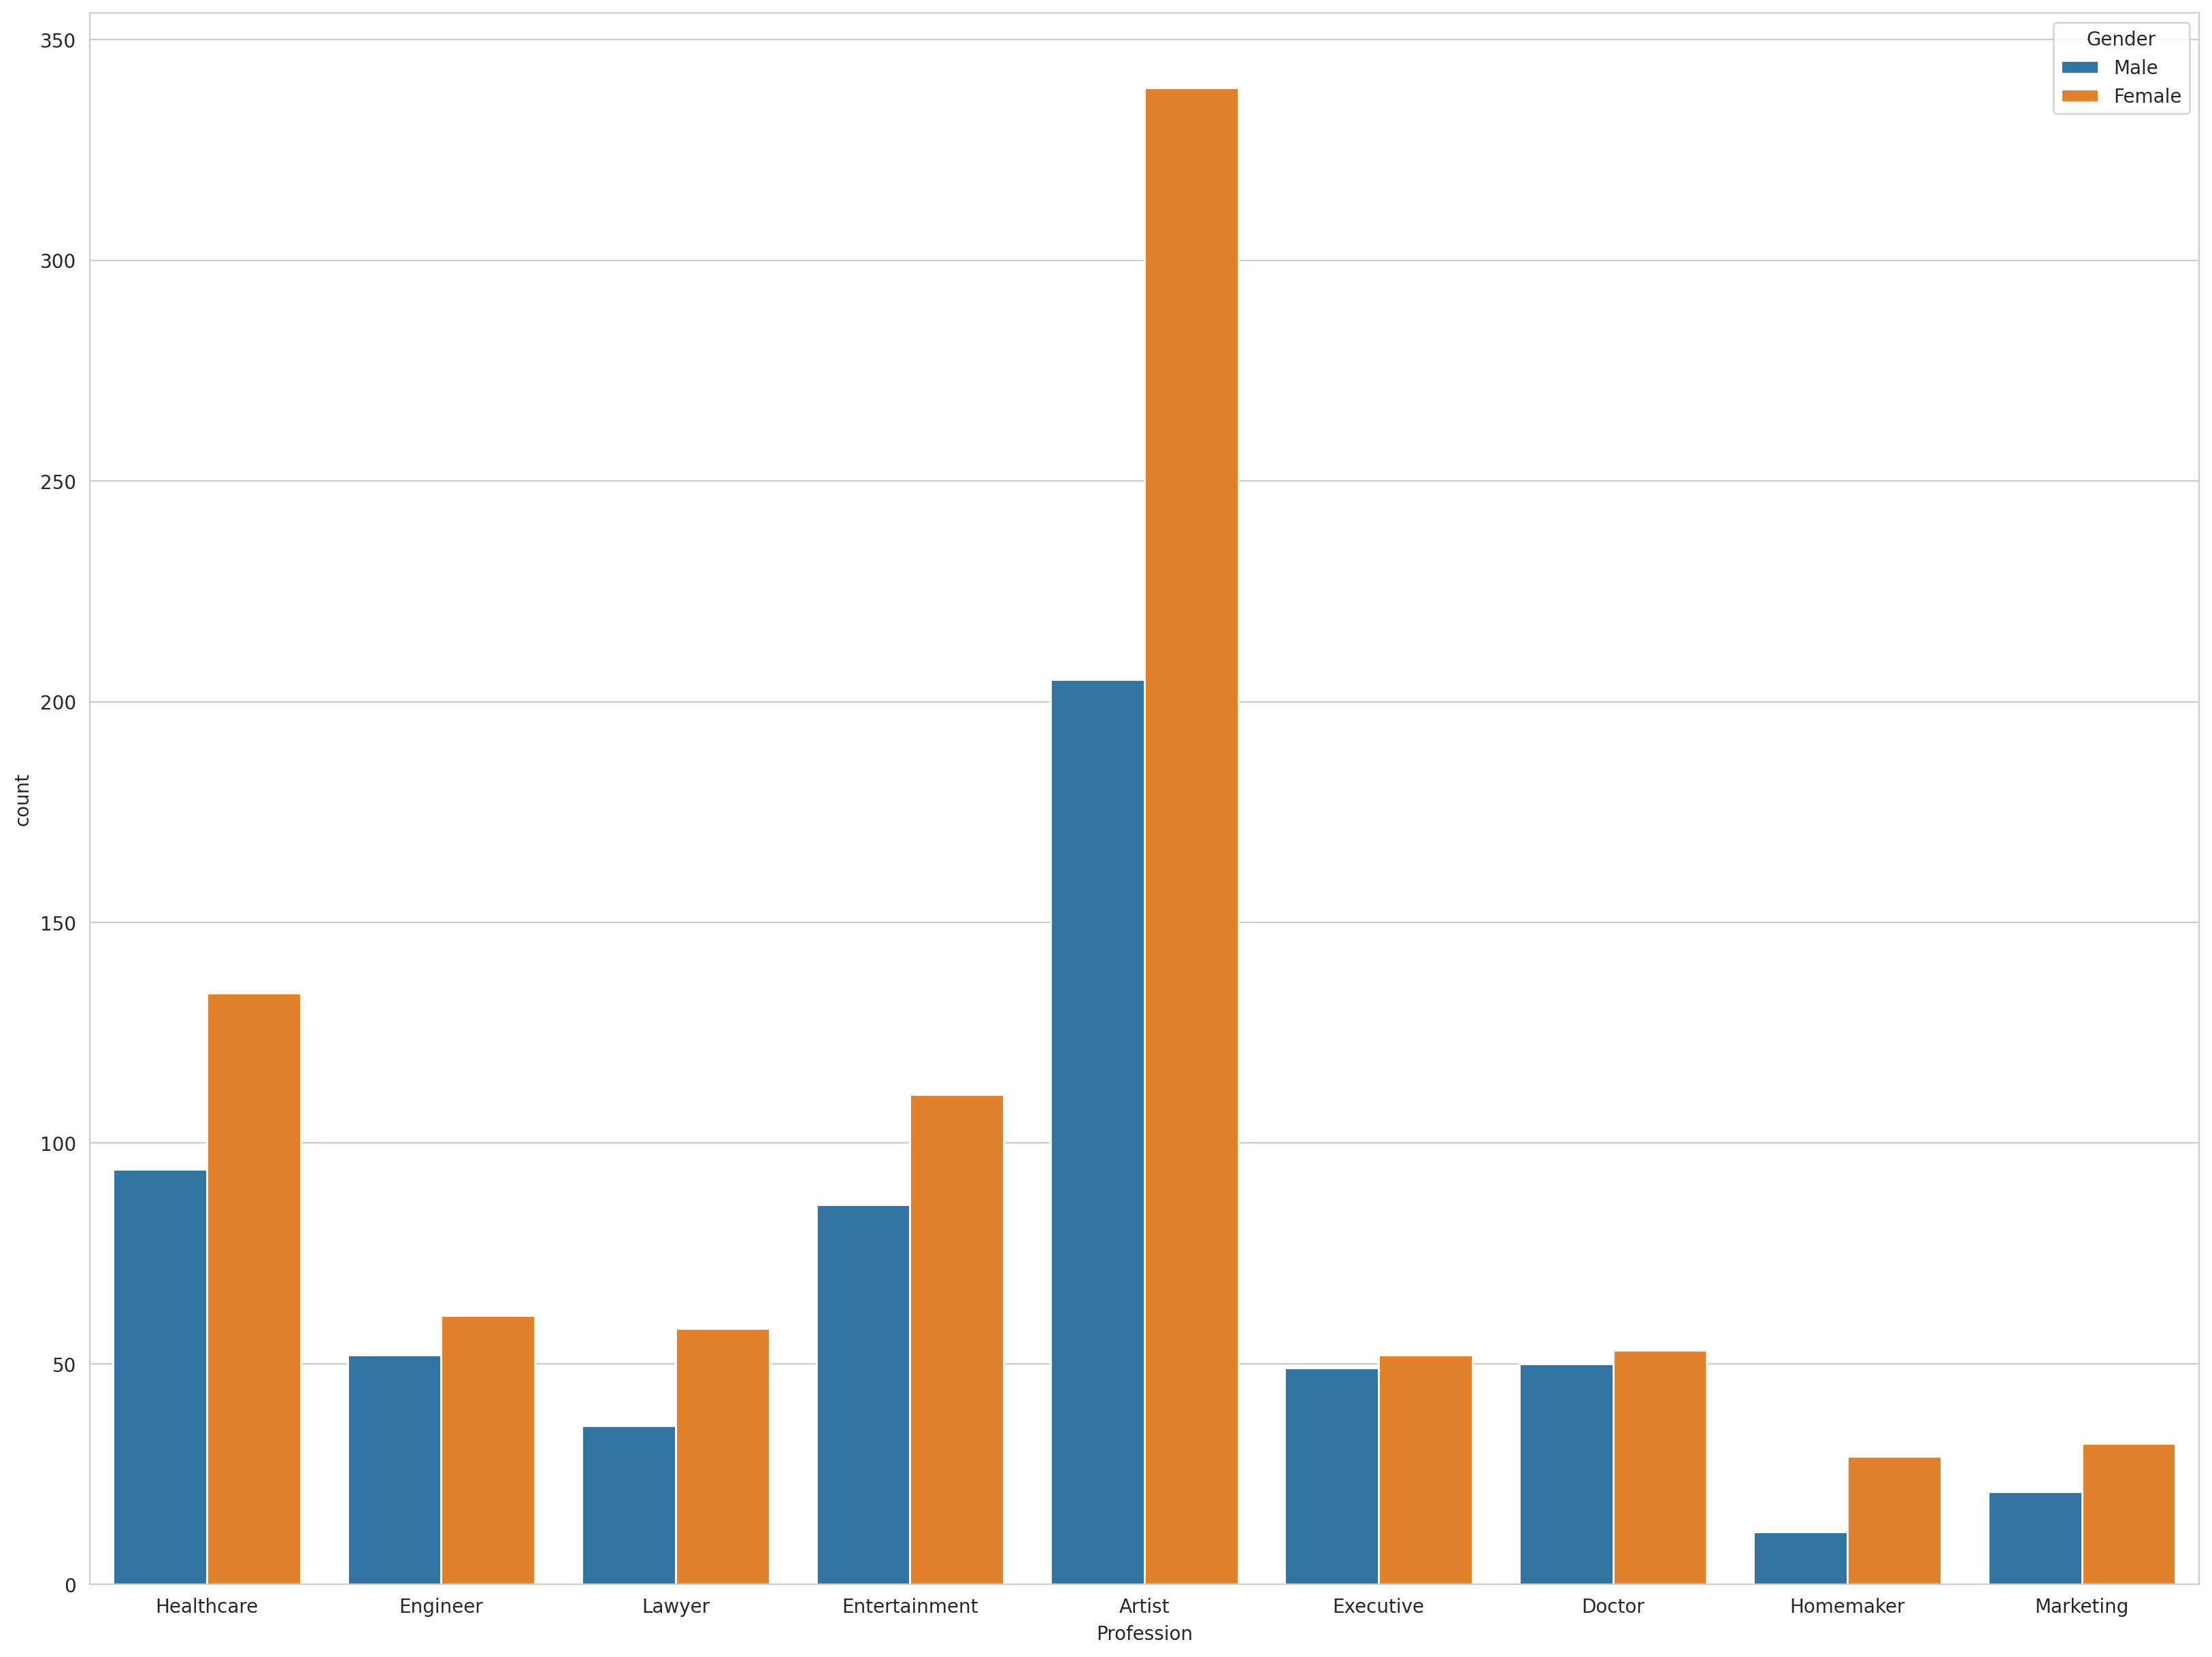

In [186]:
plt.figure(figsize=(20,15),dpi=200)
sns.countplot(data = df,x="Profession",hue="Gender")

###4.5)Annual Income based on Profession

In [187]:
list_of_role = ['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing']
x = 1
for i in list_of_role:
    df_profession = df[df.Profession==i]
    average_salary = df_profession['AnnualIncome'].mean()
    print(x, 'Annual Income average of', i, 'is', round(average_salary, 2))
    x += 1

1 Annual Income average of Healthcare is 109678.37
2 Annual Income average of Engineer is 106337.89
3 Annual Income average of Lawyer is 102284.36
4 Annual Income average of Entertainment is 110282.59
5 Annual Income average of Artist is 107138.17
6 Annual Income average of Executive is 109695.43
7 Annual Income average of Doctor is 107648.64
8 Annual Income average of Homemaker is 103255.56
9 Annual Income average of Marketing is 104381.85


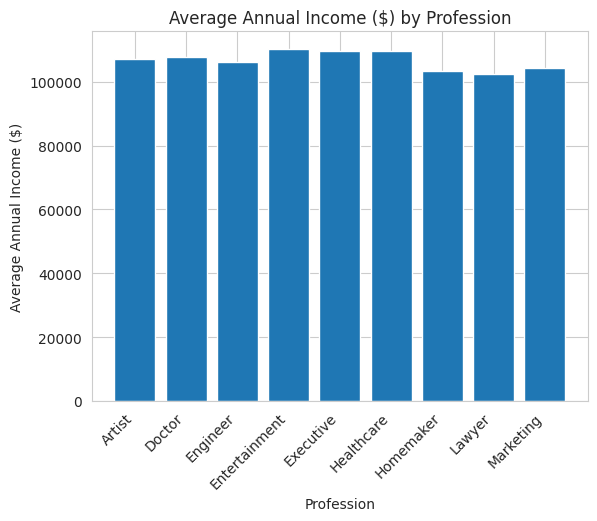

In [188]:
age_groups = df.groupby('Profession')['AnnualIncome'].mean().reset_index()

# Create column chart
plt.bar(age_groups['Profession'], age_groups['AnnualIncome'])
plt.title('Average Annual Income ($) by Profession')
plt.xlabel('Profession')
plt.ylabel('Average Annual Income ($)')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

###4.6)No. of Customers based on Family Sizes

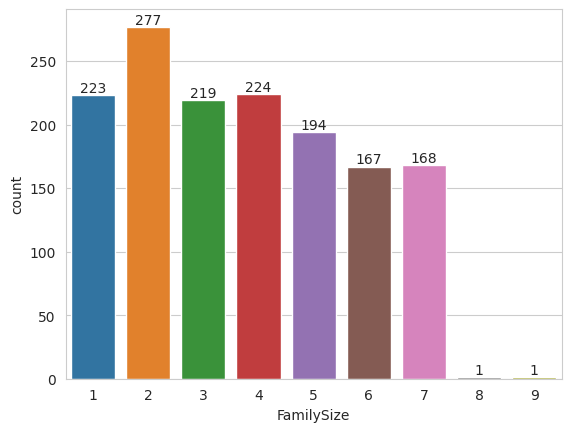

In [189]:
ax = sns.countplot(x='FamilySize', data=df)
ax.bar_label(ax.containers[0]);

###4.7)Customer's Profession Count based on Age Group

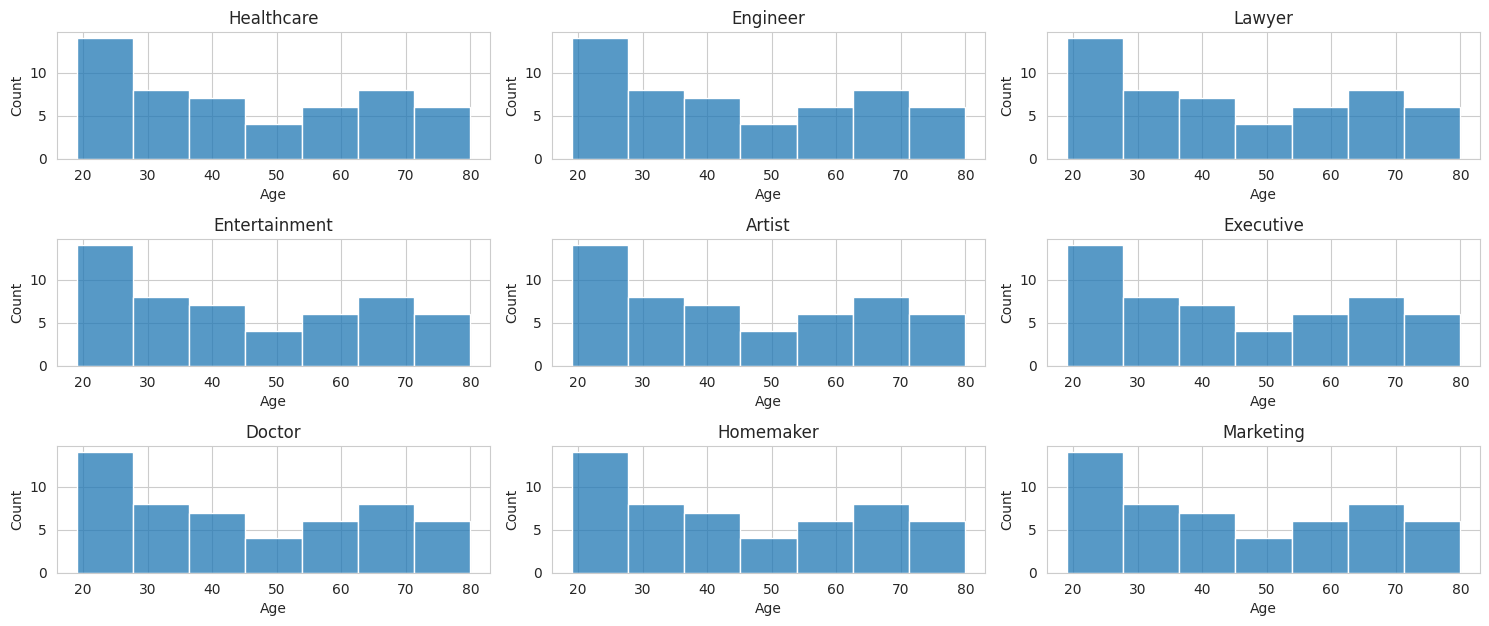

In [206]:
fig = plt.figure(figsize = (15, 8));
number = 1
row = 4
for i in list_of_role:
    data_profession = df[df['Profession']==i]
    ax = fig.add_subplot(row, 3, number)
    plt.subplot(row, 3, number)
    sns.histplot(df_profession['Age'],ax=ax)
    number += 1
    plt.title(i)
    ax.set_title(i)
    #ax.remove()
plt.tight_layout()
plt.show()

###4.7)Histogram of Customers based on Age,Annual Income,Spending Score

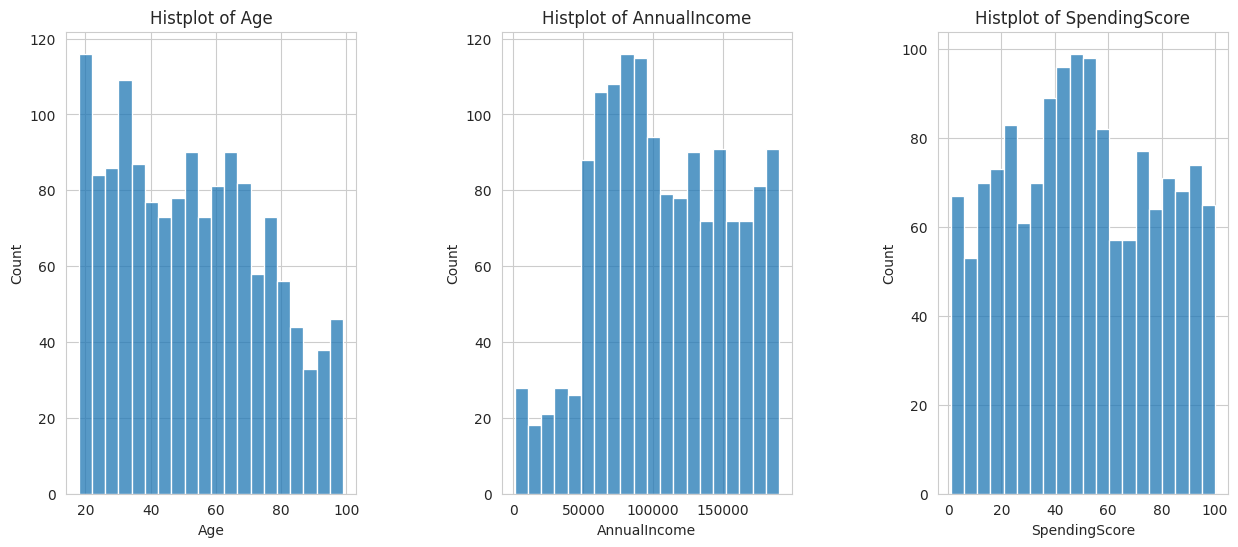

"plt.figure(1, figsize=(15, 6))\nn = 0\n\nfor x in ['Age', 'Annual Income ($)', 'Spending Score (1-100)']:\n    n += 1\n    plt.subplot(1, 3, n)\n    sns.histplot(data[x], bins=20)\n    plt.title('Distplot of {}'.format(x))\n\nplt.subplots_adjust(wspace=0.5)\nplt.show()"

In [211]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'AnnualIncome' , 'SpendingScore']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 20)
    plt.title('Histplot of {}'.format(x))
plt.subplots_adjust(wspace=0.5)
plt.show()

###4.8)Annual Income of Customer based on Profession

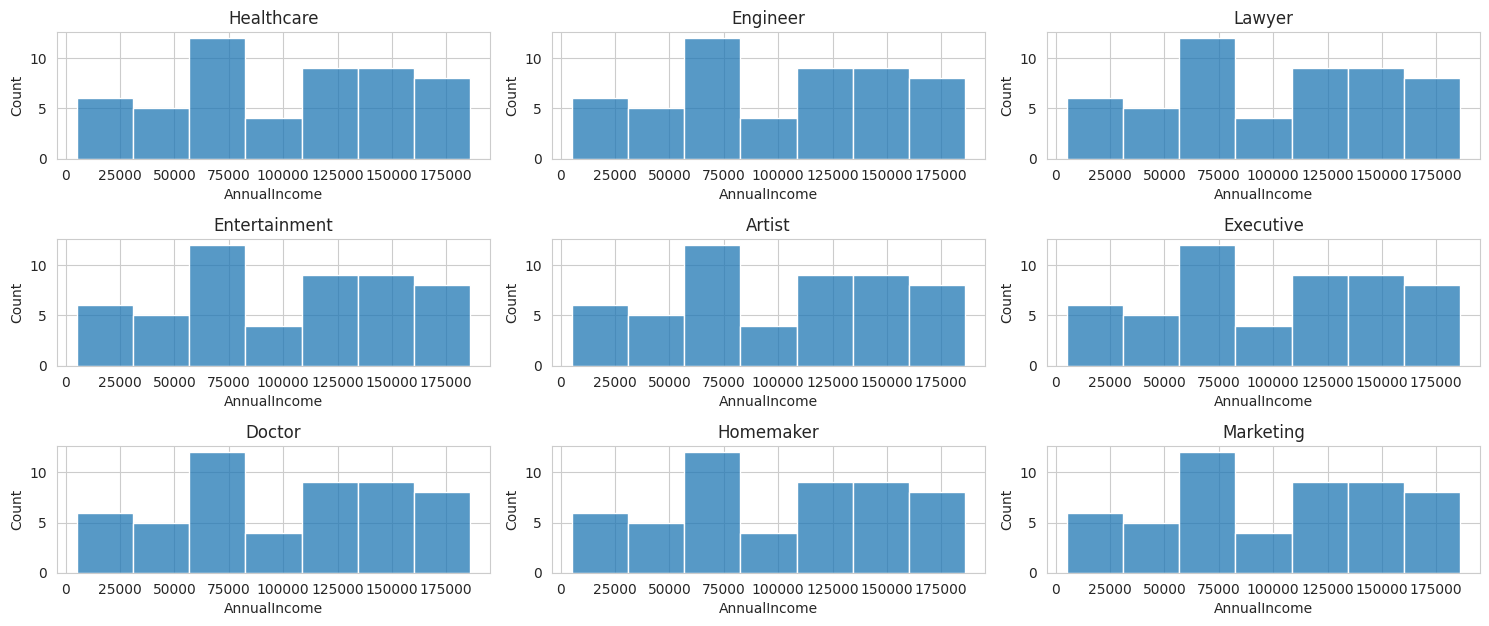

In [213]:
fig = plt.figure(figsize = (15, 8));
number = 1
row = 4
for i in list_of_role:
    data_profession = df[df['Profession']==i]
    ax = fig.add_subplot(row, 3, number)
    plt.subplot(row, 3, number)
    sns.histplot(df_profession['AnnualIncome'],ax=ax)
    number += 1
    plt.title(i)
    ax.set_title(i)
    #ax.remove()
plt.tight_layout()
plt.show()

###4.9)Spending Score of Customer based on Profession

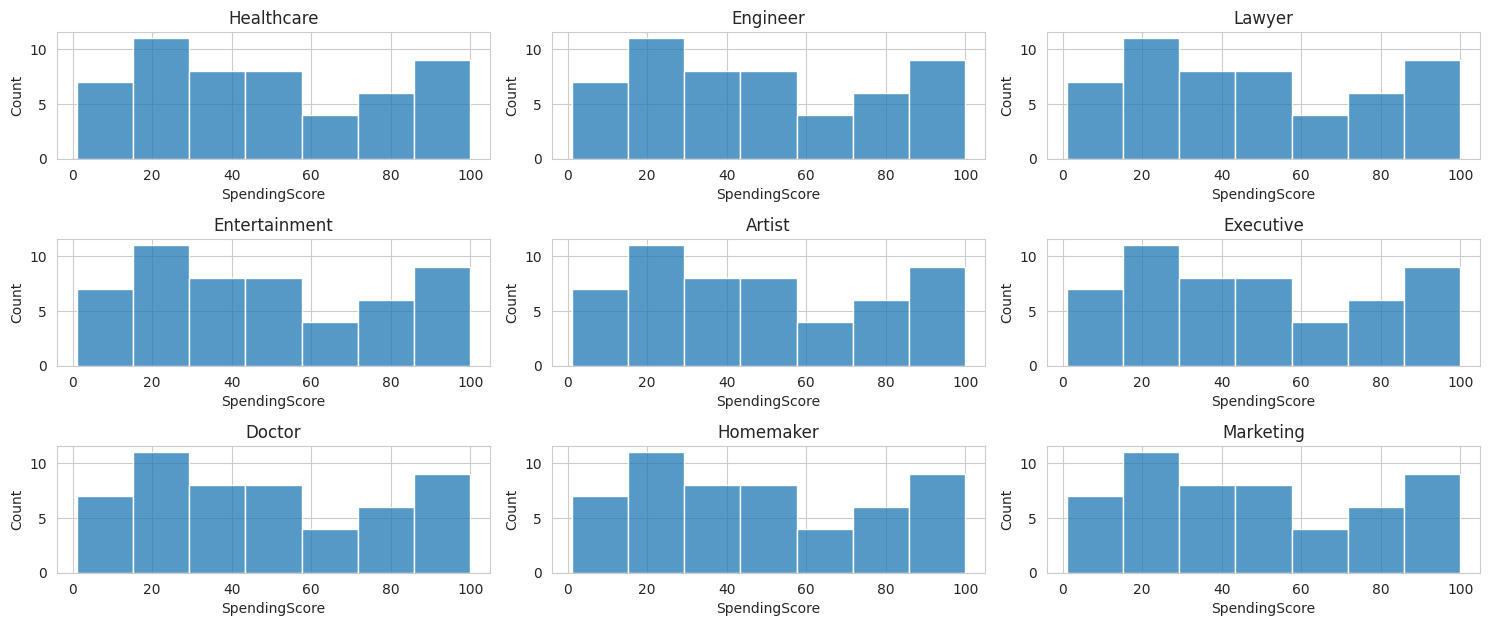

In [212]:
fig = plt.figure(figsize = (15, 8));
number = 1
row = 4
for i in list_of_role:
    data_profession = df[df['Profession']==i]
    ax = fig.add_subplot(row, 3, number)
    plt.subplot(row, 3, number)
    sns.histplot(df_profession['SpendingScore'],ax=ax)
    number += 1
    plt.title(i)
    ax.set_title(i)
    #ax.remove()
plt.tight_layout()
plt.show()

###4.9)Family Size of Customer based on SpendinG Score

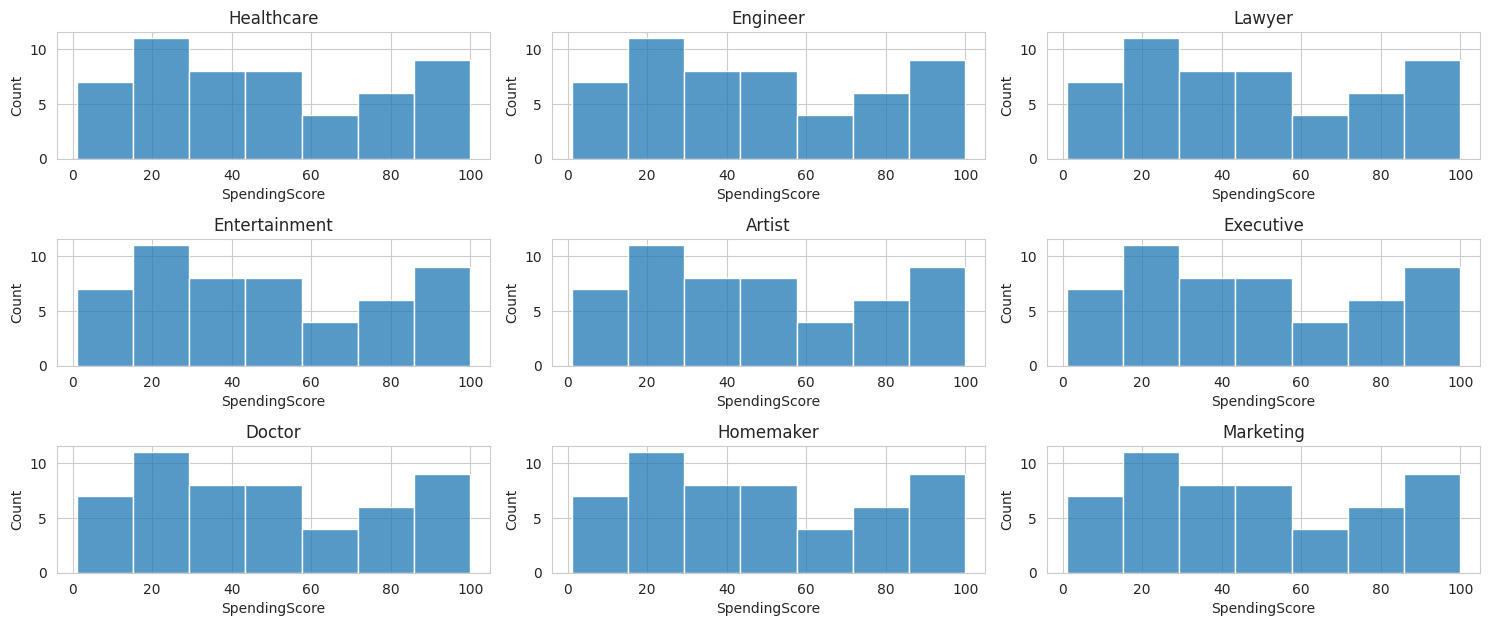

In [214]:
fig = plt.figure(figsize = (15, 8));
number = 1
row = 4
for i in list_of_role:
    data_profession = df[df['FamilySize']==i]
    ax = fig.add_subplot(row, 3, number)
    plt.subplot(row, 3, number)
    sns.histplot(df_profession['SpendingScore'],ax=ax)
    number += 1
    plt.title(i)
    ax.set_title(i)
    #ax.remove()
plt.tight_layout()
plt.show()

###4.10)Family Size of Customer based on Profession

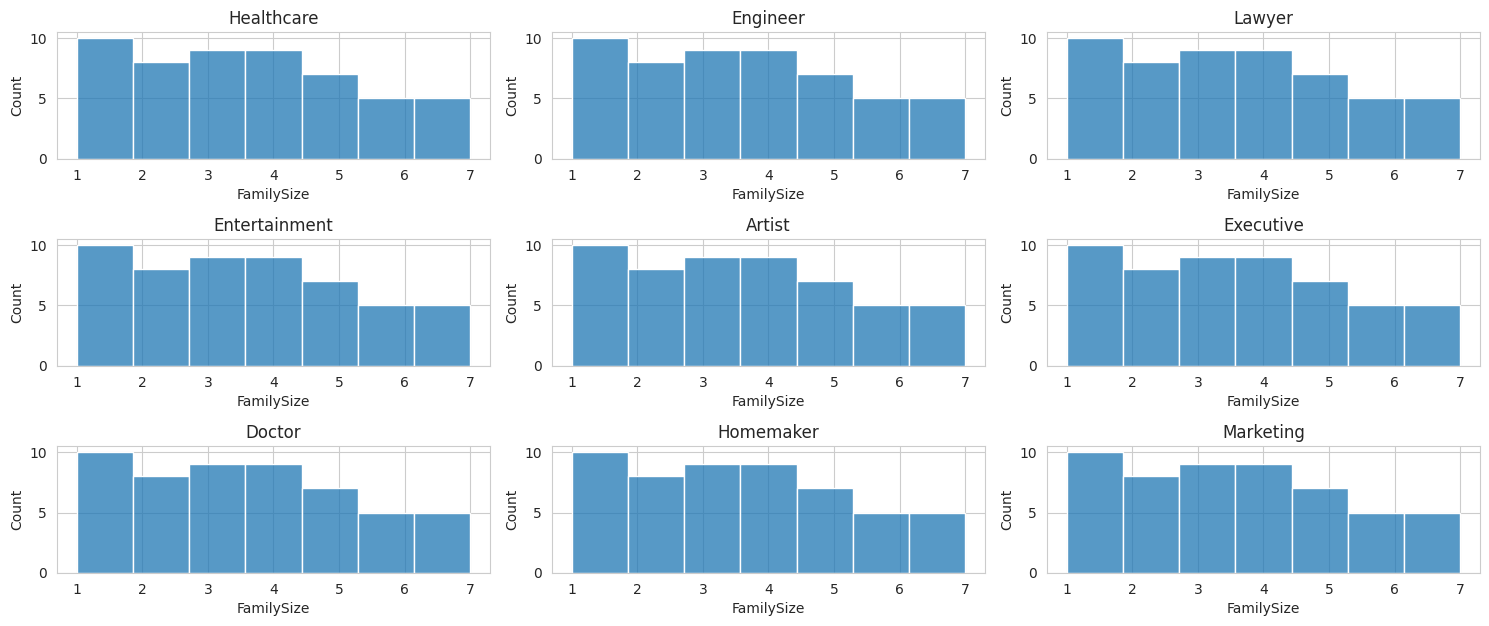

In [218]:
fig = plt.figure(figsize = (15, 8));
number = 1
row = 4
for i in list_of_role:
    data_profession = df[df['Profession']==i]
    ax = fig.add_subplot(row, 3, number)
    plt.subplot(row, 3, number)
    sns.histplot(df_profession['FamilySize'],ax=ax)
    number += 1
    plt.title(i)
    ax.set_title(i)
    #ax.remove()
plt.tight_layout()
plt.show()